### Business Scenario - Question 1

You are a Data Scientist working with the Workers' Compensation business at Suncorp. The claims handlers spend a lot of time going through the claims characteristics and putting cost estimates in the system. It is important to get accurate estimates because these impact the reserves. Currently, the estimates are not very accurate and consistent and require regular modification.

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)

# Load the dataset
file_path = '../data/data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925


In [2]:
df.drop(['ClaimNumber'], axis=1,  inplace=True)
target = 'UltimateIncurredClaimCost'

#### Handling Missing Data

In [3]:

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]

# Extract the column names with missing values
missing_column_names = missing_columns.index.tolist()

missing_columns, missing_column_names


(MaritalStatus    29
 dtype: int64,
 ['MaritalStatus'])

In [4]:
# Analyzing the distribution of 'MaritalStatus'
marital_status_distribution = df['MaritalStatus'].value_counts()
marital_status_distribution


MaritalStatus
S    26161
M    22516
U     5294
Name: count, dtype: int64

In [5]:
# Fill missing values in 'MaritalStatus' with 'U' (Unknown)
df['MaritalStatus'].fillna('U', inplace=True)

# Verify if there are any missing values left
missing_values_after_fill = df.isnull().sum()
missing_values_after_fill[missing_values_after_fill > 0]

Series([], dtype: int64)

### Feature Engineering

In [6]:
# Convert datetime columns to datetime format
df['DateTimeOfAccident'] = pd.to_datetime(df['DateTimeOfAccident'], errors='coerce')
df['DateReported'] = pd.to_datetime(df['DateReported'], errors='coerce')

# Calculate the time difference between DateTimeOfAccident and DateReported
df['AccidentToReportDays'] = (df['DateReported'] - df['DateTimeOfAccident']).dt.days

# Extract year, month, and day from the DateTimeOfAccident column
df['AccidentYear'] = df['DateTimeOfAccident'].dt.year
df['AccidentMonth'] = df['DateTimeOfAccident'].dt.month
df['AccidentDay'] = df['DateTimeOfAccident'].dt.day

# Extract year, month, and day from the DateReported column
df['ReportYear'] = df['DateReported'].dt.year
df['ReportMonth'] = df['DateReported'].dt.month
df['ReportDay'] = df['DateReported'].dt.day

# Drop time features
df.drop(['DateTimeOfAccident', 'DateReported'], axis=1, inplace=True)

# Display the first few rows to verify the new features
df.head()


,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,...,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost,AccidentToReportDays,AccidentYear,AccidentMonth,AccidentDay,ReportYear,ReportMonth,ReportDay
0,48,M,M,0,0,500.00,F,38.0,5,2.254325,...,1.161294,1500,4748.203388,86,2002,4,9,2002,7,5
1,43,F,M,0,0,509.34,F,37.5,5,2.356002,...,-1.305332,5500,6326.285819,12,1999,1,7,1999,1,20
2,30,M,U,0,0,709.10,F,38.0,5,0.817685,...,-0.259750,1700,2293.949087,20,1996,3,25,1996,4,14
3,41,M,S,0,0,555.46,F,38.0,5,4.022864,...,-0.343594,15000,17786.487170,29,2005,6,22,2005,7,22
4,36,M,M,0,0,377.10,F,38.0,5,3.383056,...,-0.038234,2800,4014.002925,28,1990,8,29,1990,9,27


#### Total Dependents

In [7]:
# Create Total Dependents feature
df['TotalDependents'] = df['DependentChildren'] + df['DependentsOther']

df.drop(['DependentChildren','DependentsOther'], axis=1, inplace=True)

#### One hot encoding features

In [8]:
# One-hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender', 'MaritalStatus', 'PartTimeFullTime']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Convert encoded features to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with the main dataset
df = pd.concat([df, encoded_features_df], axis=1)

# Drop original categorical columns
df.drop(columns=categorical_features, inplace=True)

/Users/mahatisuvvari/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Scaling continuous features

In [9]:
from sklearn.preprocessing import StandardScaler

# Extract continuous features
continuous_features = ['TotalDependents', 'HoursWorkedPerWeek',
       'DaysWorkedPerWeek','ClaimDescriptionKeyword_0',
       'ClaimDescriptionKeyword_1', 'ClaimDescriptionKeyword_2',
       'ClaimDescriptionKeyword_3', 'ClaimDescriptionKeyword_4',
       'ClaimDescriptionKeyword_5', 'ClaimDescriptionKeyword_6',
       'ClaimDescriptionKeyword_7', 'ClaimDescriptionKeyword_8',
       'ClaimDescriptionKeyword_9', 'ClaimDescriptionKeyword_10',
       'ClaimDescriptionKeyword_11', 'AccidentToReportDays', 'AccidentYear', 
       'AccidentMonth', 'AccidentDay', 'ReportYear', 'ReportMonth', 
       'ReportDay','Age', 'WeeklyWages', 'InitialIncurredClaimsCost']

# Scaling continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Display the scaled continuous features
scaled_df = df.copy()
scaled_df.head()


,Age,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,ClaimDescriptionKeyword_1,ClaimDescriptionKeyword_2,ClaimDescriptionKeyword_3,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,...,ReportDay,TotalDependents,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,1.167923,0.336376,0.021078,0.170688,-0.089609,-0.616907,-0.846976,-0.333072,-0.123619,1.637256,...,-1.241779,-0.234827,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.755452,0.373940,-0.018704,0.170688,0.003210,-0.497952,0.971046,-0.686364,1.710635,0.393825,...,0.458489,-0.234827,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.316974,1.177363,0.021078,0.170688,-1.401107,-0.398841,0.990700,-0.164466,-0.036644,-0.296526,...,-0.221618,-0.234827,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.590464,0.559432,0.021078,0.170688,1.524875,2.066026,-0.017245,1.130292,0.070748,1.077577,...,0.685191,-0.234827,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.177992,-0.157921,0.021078,0.170688,0.940800,0.234675,1.103339,-1.196205,-0.609736,-1.589146,...,1.251947,-0.234827,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


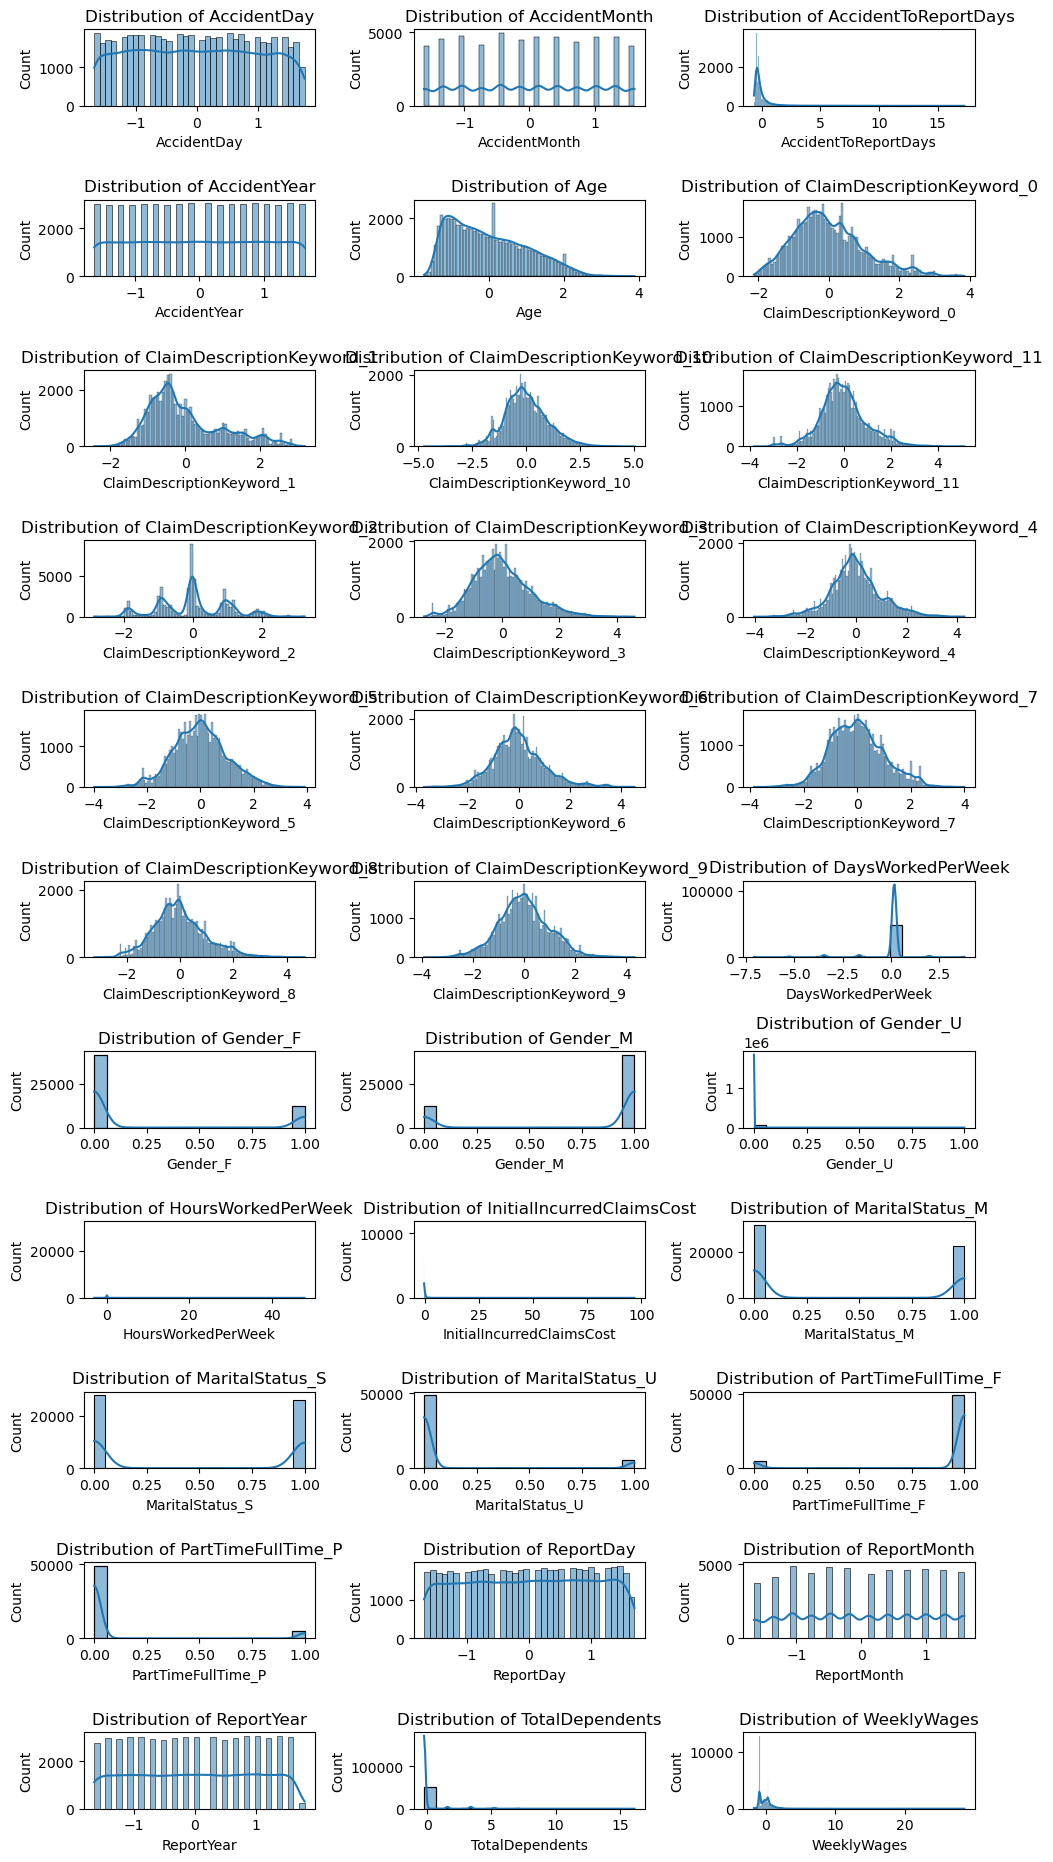

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify all continuous variables apart from the target variable
continuous_variables = df.select_dtypes(include=['float64', 'int64']).columns.difference(['UltimateIncurredClaimCost'])

# Adjust the plotting to handle all continuous variables correctly
plt.figure(figsize=(10, 20))

# Adjusting the number of rows and columns in the subplot
num_plots = len(continuous_variables)
rows = (num_plots // 3) + 1

for i, feature in enumerate(continuous_variables, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Based on the charts, we can scale 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'AccidentToReportDays' using sklearns quantile transformer to mitigate outliers and have a uniform distribution of data.

#### Transforming skewed continuous variables into normal or uniform distribution.

In [11]:
# from sklearn.preprocessing import QuantileTransformer

# # Initialize the QuantileTransformer
# quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=42)

# # Apply the transformer to the specified columns
# df[[ 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'AccidentToReportDays']] = quantile_transformer.fit_transform(
#     df[['HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'AccidentToReportDays']]
# )

# # Plot the transformed distributions
# plt.figure(figsize=(15, 10))

# for i, feature in enumerate(['HoursWorkedPerWeek', 'DaysWorkedPerWeek','AccidentToReportDays'], 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(df[feature], kde=True)
#     plt.title(f'Transformed Distribution of {feature}')

# plt.tight_layout()
# plt.show()


/Users/mahatisuvvari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


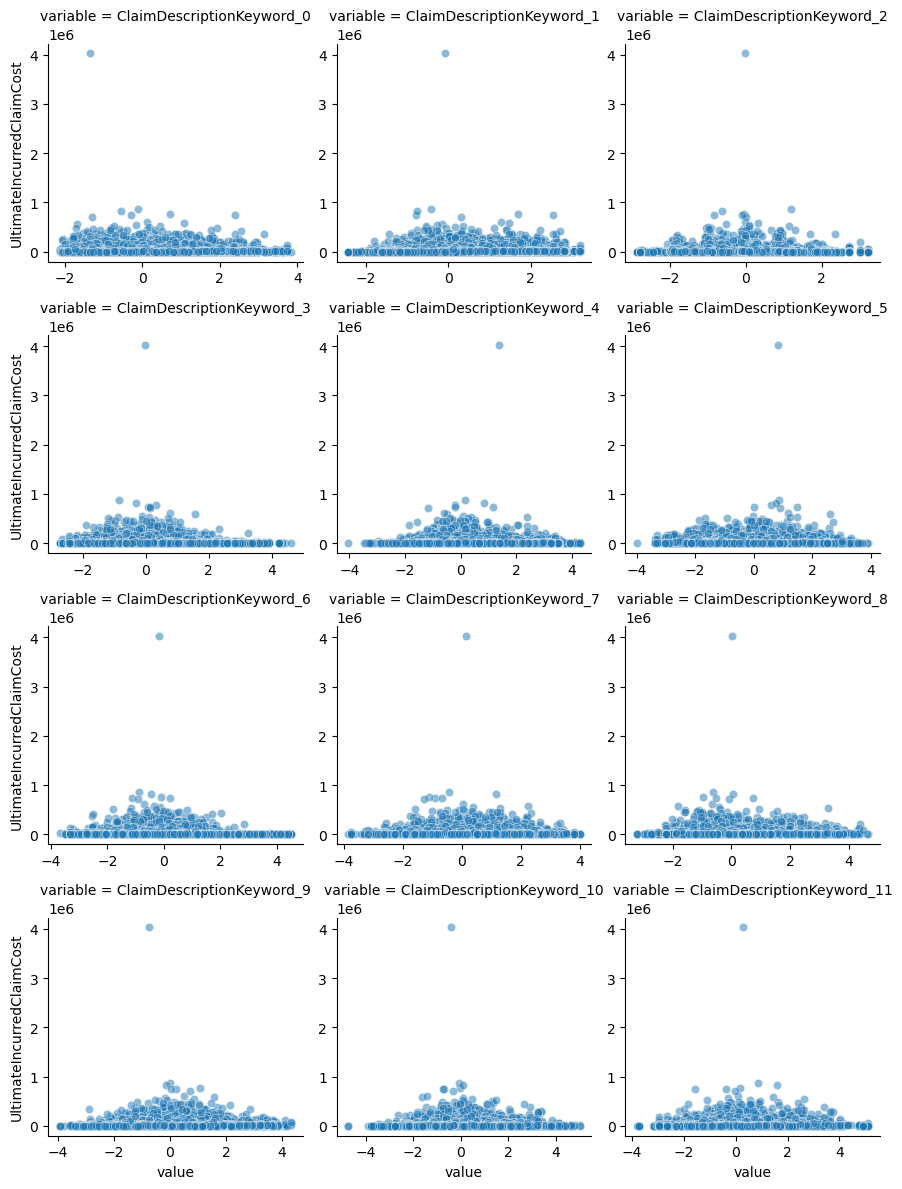

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select `ClaimDescriptionKeyword` features
claim_description_keywords = df.filter(like='ClaimDescriptionKeyword')

# Create a DataFrame with the target variable and the `ClaimDescriptionKeyword` features
plot_df = pd.concat([claim_description_keywords, df['UltimateIncurredClaimCost']], axis=1)

# Create the FacetGrid
g = sns.FacetGrid(plot_df.melt(id_vars='UltimateIncurredClaimCost'), col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'UltimateIncurredClaimCost', alpha=0.5)

plt.show()


#### Outlier detection and removing highly correlated features

In [13]:
import numpy as np

# Outlier treatment function
def treat_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the outlier treatment to all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['UltimateIncurredClaimCost'])
df = treat_outliers(df, numerical_columns)


In [14]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to ignore the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(upper_triangle_mask)

# Identify features with correlation greater than 0.8
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop the highly correlated features
df_reduced = df.drop(columns=correlated_features)

correlated_features


['ReportYear', 'MaritalStatus_S']

#### Baseline Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Separate features and target variable
X = df_reduced.drop(columns=target)
y = df_reduced[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)


# Print the evaluation metrics
print(f"Base Model Linear Regression MAE: {mae}")
print(f"Base Model Linear Regression R2: {r2}")
print(f"Base Model Linear Regression MAPE: {mape}")



Base Model Linear Regression MAE: 9087.896373911479
Base Model Linear Regression R2: 0.2182874610252986
Base Model Linear Regression MAPE: 2.1821275007952257


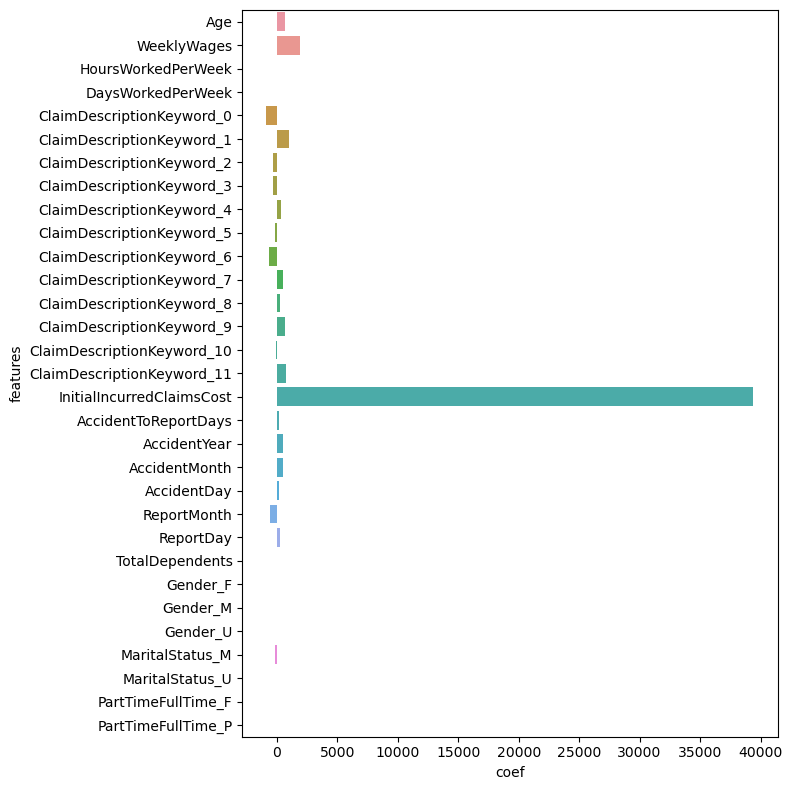

In [17]:
_df = pd.DataFrame({'coef': model.coef_.ravel(), 'features': X_train.columns})
# _df['variable'] = baseline['preproc'].get_feature_names_out()


fig, ax = plt.subplots(figsize = (8, 8))
sns.barplot(
    data = _df, x = 'coef', y = 'features'
)
fig.tight_layout()
plt.show()

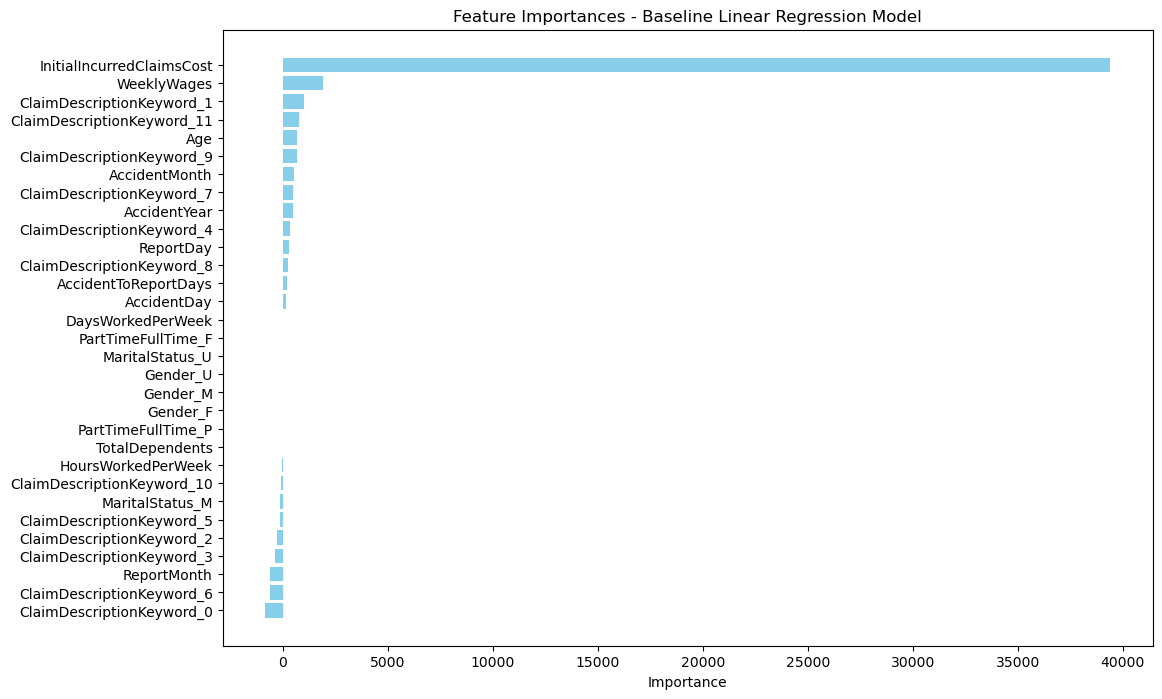

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the linear regression model (coefficients)
feature_importances = model.coef_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Baseline Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()



#### Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mape = mean_absolute_percentage_error(y_test, rf_y_pred)

# Print the evaluation metrics
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2: {rf_r2}")
print(f"Random Forest MAPE: {rf_mape}")

Random Forest MAE: 8826.003353364978
Random Forest RMSE: 27347.045736370852
Random Forest R2: 0.1614370005409983
Random Forest MAPE: 0.9972179530191685


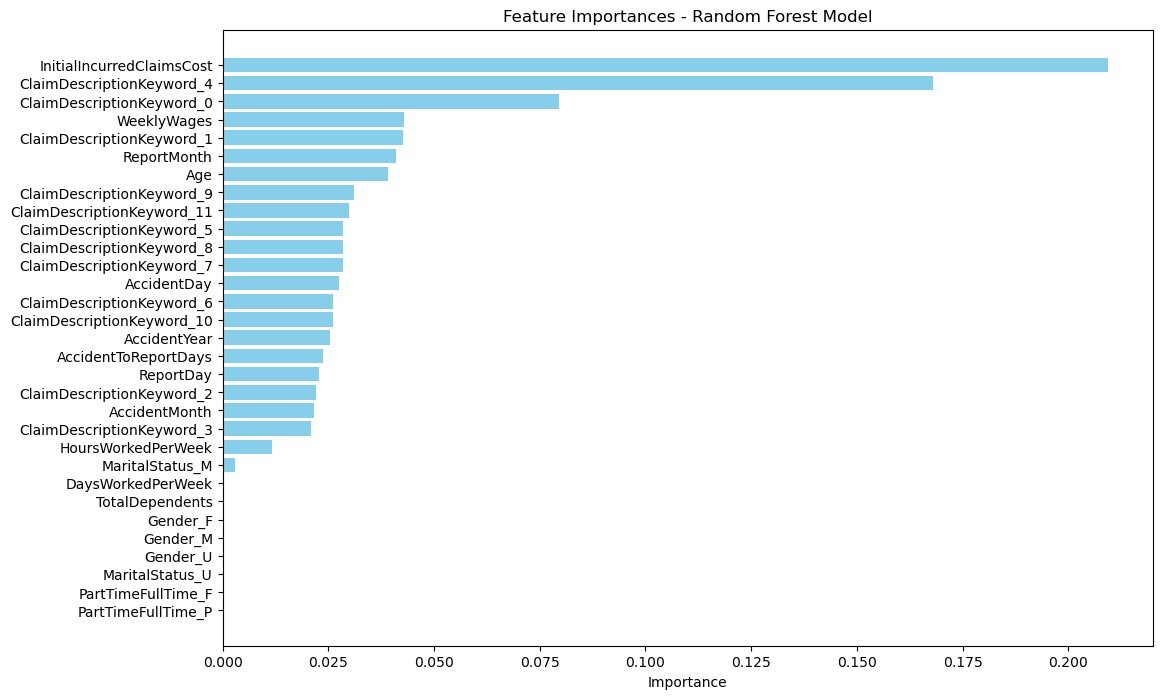

In [21]:
# Get feature importances from the random forest model
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
})

# Sort the DataFrame by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


#### Gradient Boosting for performance and better results.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300,  # Number of boosting stages to be run
    learning_rate=0.1,  # Learning rate or shrinkage
    max_depth=3,  # Maximum depth of the individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    subsample=0.8,  # Fraction of samples to be used for fitting the individual base learners
    loss='absolute_error',
    random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
gbr_y_pred = gbr.predict(X_test)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_rmse = gbr_mse ** 0.5
gbr_r2 = r2_score(y_test, gbr_y_pred)
gbr_mape = mean_absolute_percentage_error(y_test, gbr_y_pred)

print(f"Gradient Boosting Regressor MAE: {gbr_mae}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Gradient Boosting Regressor R2: {gbr_r2}")
print(f"Gradient Boosting Regressor MAPE: {gbr_mape}")


Gradient Boosting Regressor MAE: 5710.282083550198
Gradient Boosting Regressor RMSE: 26828.19654485795
Gradient Boosting Regressor R2: 0.19295487116137044
Gradient Boosting Regressor MAPE: 0.31379701282486056


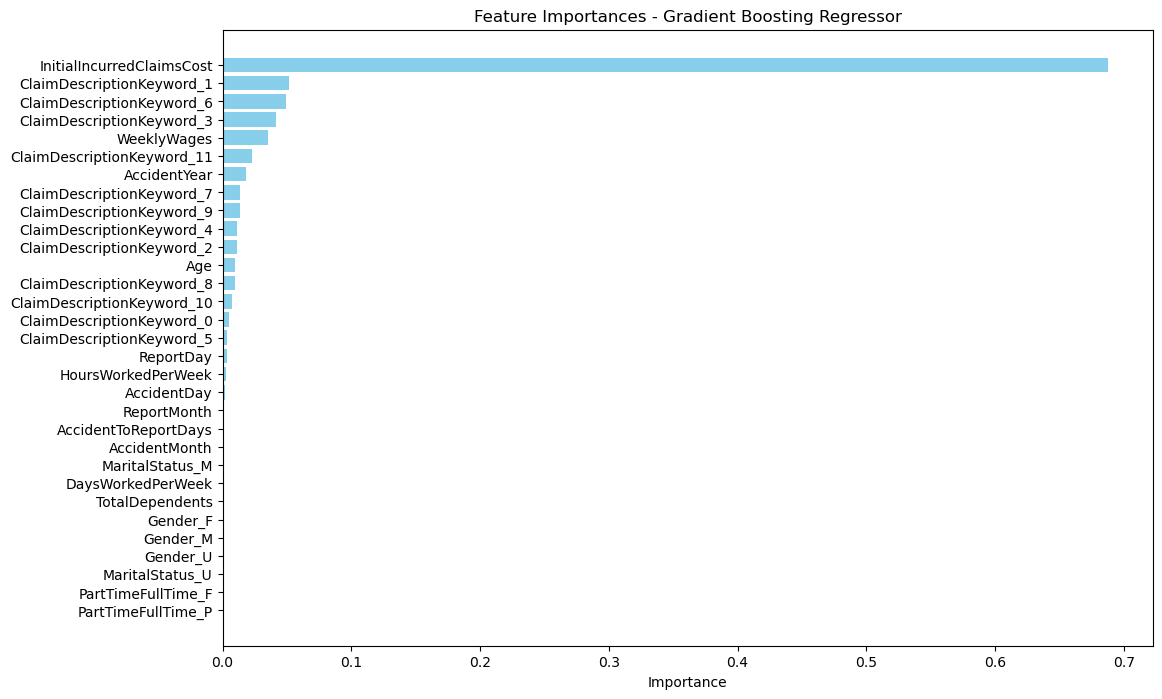

In [23]:
import matplotlib.pyplot as plt

# Feature importances for Gradient Boosting Regressor
gbr_feature_importances = gbr.feature_importances_

# Create a DataFrame for feature importances
gbr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbr_feature_importances
})

# Sort the DataFrame by importance
gbr_importance_df = gbr_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for Gradient Boosting Regressor
plt.figure(figsize=(12, 8))
plt.barh(gbr_importance_df['Feature'], gbr_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [24]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter space for hyperparameter tuning
param_space = {
    'n_estimators': (100, 300),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'subsample': (0.6, 1.0, 'uniform')
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize BayesSearchCV with cross-validation
bayes_search = BayesSearchCV(estimator=gbr, search_spaces=param_space, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2, scoring='neg_mean_absolute_error'')

# Fit the Bayes search to the data
bayes_search.fit(X_train, y_train)

# Get the best parameters from the Bayes search
best_params = bayes_search.best_params_
print(f"Best Parameters: {best_params}")


**Best Parameters:** OrderedDict([('learning_rate', 0.014604866697801271), ('max_depth', 6), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 300), ('subsample', 0.7422132601334341)])

In [25]:
# Train the best model with the entire training data
best_gbr_model = bayes_search.best_estimator_

# Make predictions on the test set
best_gbr_y_pred = best_gbr_model.predict(X_test)

# Evaluate the model
best_gbr_mae = mean_absolute_error(y_test, best_gbr_y_pred)
best_gbr_mse = mean_squared_error(y_test, best_gbr_y_pred)
best_gbr_rmse = best_gbr_mse ** 0.5
best_gbr_r2 = r2_score(y_test, best_gbr_y_pred)
best_gbr_mape = mean_absolute_percentage_error(y_test, best_gbr_y_pred)

print(f"Best Gradient Boosting Regressor MAE: {best_gbr_mae}")
print(f"Best Gradient Boosting Regressor RMSE: {best_gbr_rmse}")
print(f"Best Gradient Boosting Regressor R2: {best_gbr_r2}")
print(f"Best Gradient Boosting Regressor MAPE: {best_gbr_mape}")


In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the best Gradient Boosting Regressor model
best_gbr_feature_importances = best_gbr_model.feature_importances_

# Create a DataFrame for feature importances
best_gbr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gbr_feature_importances
})

# Sort the DataFrame by importance
best_gbr_importance_df = best_gbr_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(best_gbr_importance_df['Feature'], best_gbr_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Best Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [27]:
# !pip install xgboost

#### XGBoost Regressor

In [28]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgbr = xgb.XGBRegressor(n_estimators=300,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    max_depth=3,  # Maximum depth of a tree
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='reg:absoluteerror',  # Specify the learning task and the corresponding learning objective
    n_jobs=-1,  # Number of parallel threads used to run xgboost
    random_state=42)

# Train the model
xgbr.fit(X_train, y_train)

# Make predictions on the test set
xgbr_y_pred = xgbr.predict(X_test)

# Evaluate the model
xgbr_mae = mean_absolute_error(y_test, xgbr_y_pred)
xgbr_mse = mean_squared_error(y_test, xgbr_y_pred)
xgbr_rmse = xgbr_mse ** 0.5
xgbr_r2 = r2_score(y_test, xgbr_y_pred)
xgbr_mape = mean_absolute_percentage_error(y_test, xgbr_y_pred)

print(f"XGBoost Regressor MAE: {xgbr_mae}")
print(f"XGBoost Regressor RMSE: {xgbr_rmse}")
print(f"XGBoost Regressor R2: {xgbr_r2}")
print(f"XGBoost Regressor MAPE: {xgbr_mape}")


XGBoost Regressor MAE: 5711.4162939477
XGBoost Regressor RMSE: 26809.66130516687
XGBoost Regressor R2: 0.1940696391608876
XGBoost Regressor MAPE: 0.31896012648789357


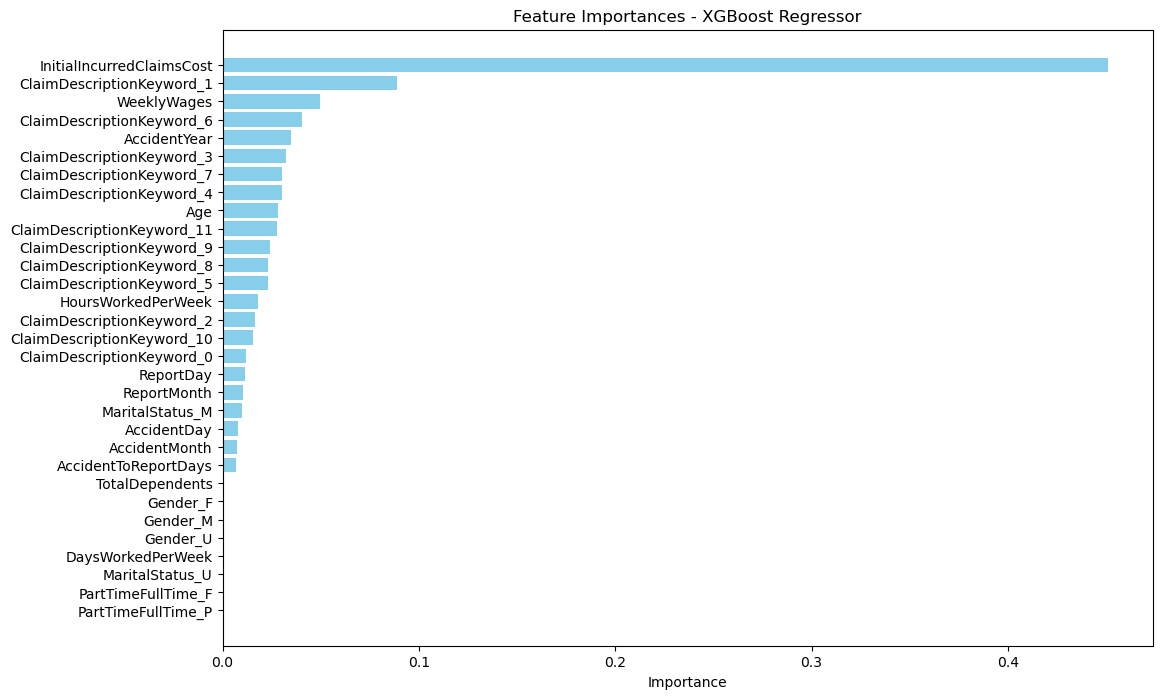

In [29]:
# Feature importances for XGBoost Regressor
xgbr_feature_importances = xgbr.feature_importances_

# Create a DataFrame for feature importances
xgbr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgbr_feature_importances
})

# Sort the DataFrame by importance
xgbr_importance_df = xgbr_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for XGBoost Regressor
plt.figure(figsize=(12, 8))
plt.barh(xgbr_importance_df['Feature'], xgbr_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - XGBoost Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [30]:
!pip install shap

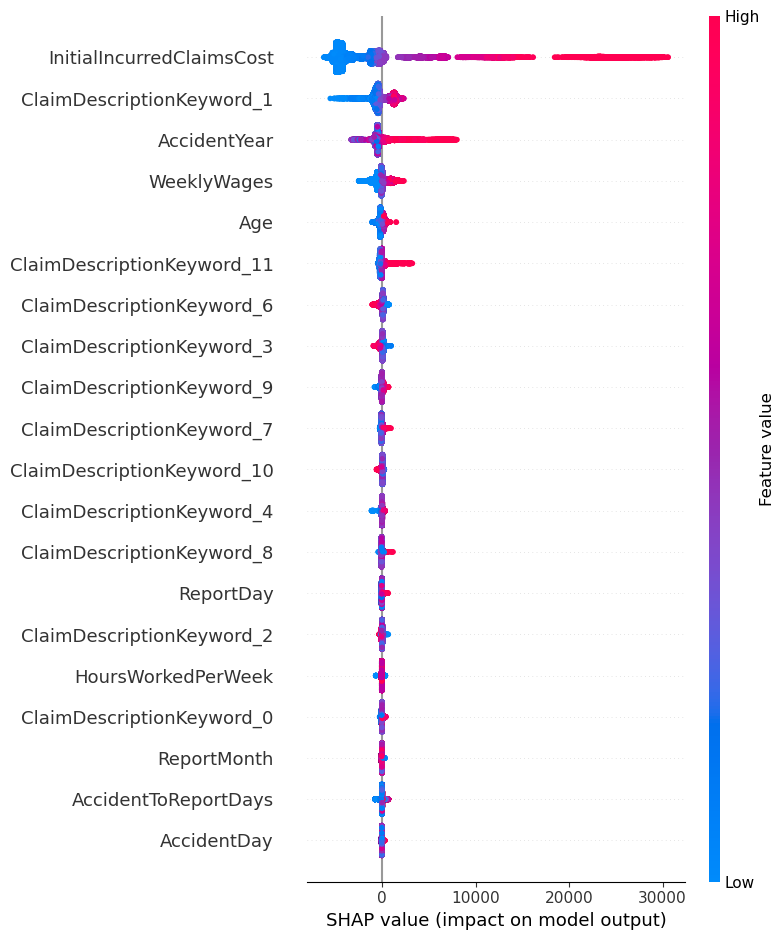

In [33]:
import shap
# Explain the model predictions using SHAP
explainer = shap.Explainer(xgbr)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)